## Sales Prediction using Python

Sales prediction means predicting how much of a product people will buy based on factors
such as the amount you spend to advertise your product, the segment of people you
advertise for, or the platform you are advertising on about your product.


Typically, a product and service-based business always need their Data Scientist to predict
their future sales with every step they take to manipulate the cost of advertising their
product. So let’s start the task of sales prediction with machine learning using Python.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
df = pd.read_csv("Advertising.csv")
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df = df.drop('Unnamed: 0', axis=1)

In [4]:
df.reset_index(drop=True, inplace=True)

In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

### EDA

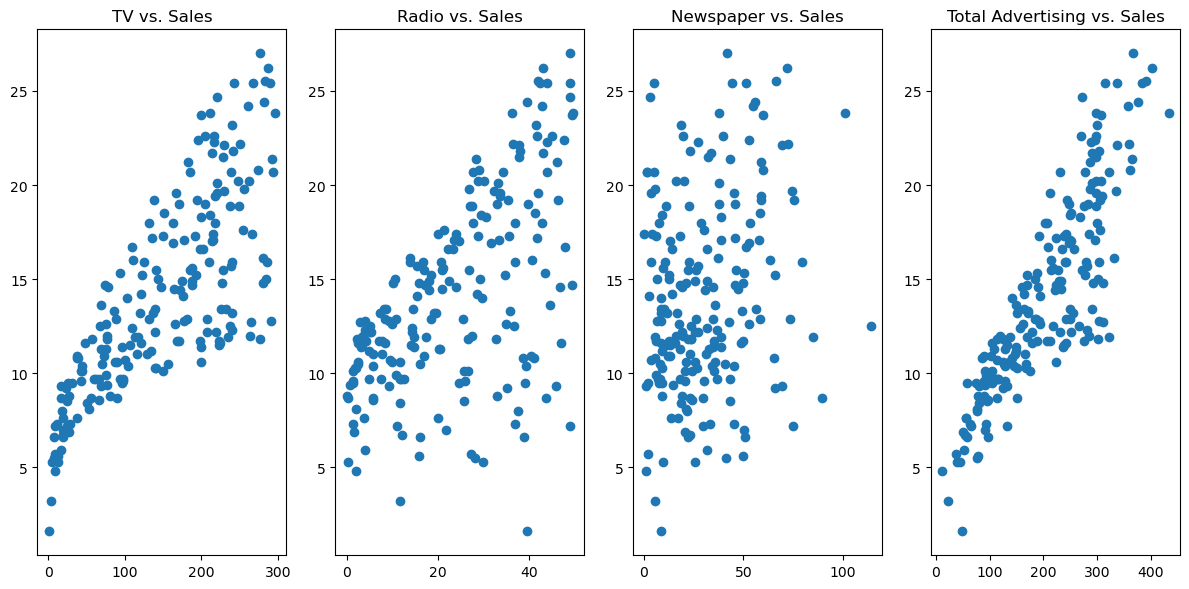

In [7]:
# Create scatter plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 4, 1)
plt.scatter(df['TV'], df['Sales'])
plt.title('TV vs. Sales')

plt.subplot(1, 4, 2)
plt.scatter(df['Radio'], df['Sales'])
plt.title('Radio vs. Sales')

plt.subplot(1, 4, 3)
plt.scatter(df['Newspaper'], df['Sales'])
plt.title('Newspaper vs. Sales')

plt.subplot(1, 4, 4)
plt.scatter(df['TV'] + df['Radio'] + df['Newspaper'], df['Sales'])
plt.title('Total Advertising vs. Sales')

plt.tight_layout()
plt.show()

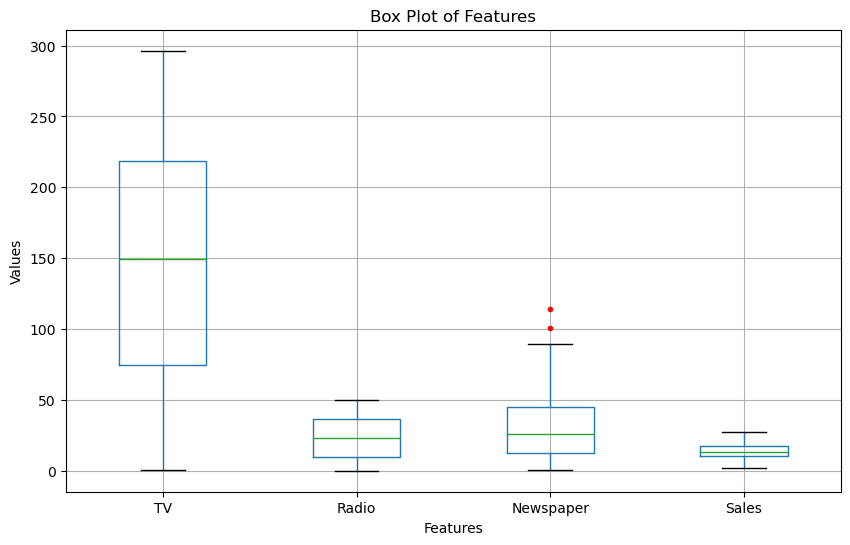

In [8]:
# Create a box plot
plt.figure(figsize=(10, 6))
df.boxplot(sym='r.')
plt.title('Box Plot of Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

Because of the short dataset, we may ignore the limited number of outliers that are present here.

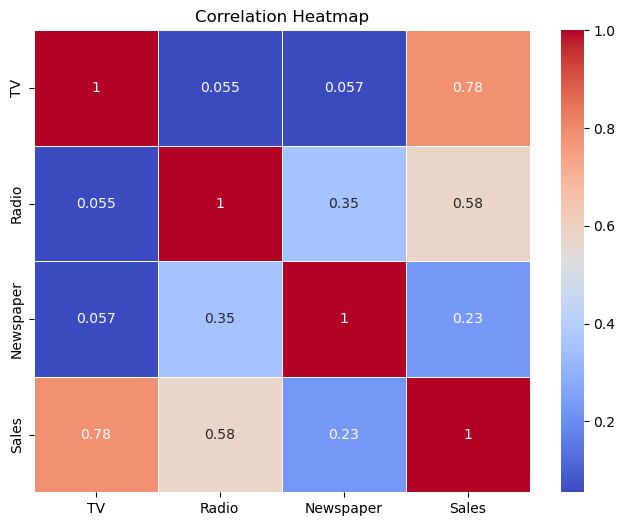

In [9]:
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sn.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

We can observe that television and radio have a greater impact on sales.

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(df)

scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

scaled_df.head()


,TV,Radio,Newspaper,Sales
0,0.775786,0.762097,0.605981,0.807087
1,0.148123,0.792339,0.394019,0.346457
2,0.055800,0.925403,0.606860,0.303150
3,0.509976,0.832661,0.511873,0.665354
4,0.609063,0.217742,0.510994,0.444882


### Splitting

In [11]:
from sklearn.model_selection import train_test_split

X = scaled_df.drop('Sales', axis=1) 
y = scaled_df['Sales'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (160, 3)
X_test shape: (40, 3)
y_train shape: (160,)
y_test shape: (40,)


### Linear regression

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared (R2) Score:", r2)

Mean Squared Error: 0.00491986073838444
R-squared (R2) Score: 0.899438024100912


In [13]:
from sklearn.preprocessing import PolynomialFeatures

# Apply feature engineering: Create polynomial features
poly = PolynomialFeatures(degree=2)  
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()

model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared (R2) Score:", r2)

Mean Squared Error: 0.0006400121342580174
R-squared (R2) Score: 0.9869181490609604


### Ridge regression

In [14]:
from sklearn.linear_model import Ridge

# Create a Ridge Regression model
ridge_model = Ridge(alpha=1.0)

ridge_model.fit(X_train_poly, y_train)

y_pred_ridge = ridge_model.predict(X_test_poly)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression - Mean Squared Error:", mse_ridge)
print("Ridge Regression - R-squared (R2) Score:", r2_ridge)

Ridge Regression - Mean Squared Error: 0.001889668497995426
Ridge Regression - R-squared (R2) Score: 0.9613751672948607


### DecisionTree

In [15]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_decision_tree(X_train, y_train, X_test, y_test, max_depth):
    # Create a Decision Tree Regressor model
    tree_model = DecisionTreeRegressor(max_depth=max_depth)

    tree_model.fit(X_train, y_train)

    y_pred_tree = tree_model.predict(X_test)

    mse_tree = mean_squared_error(y_test, y_pred_tree)
    r2_tree = r2_score(y_test, y_pred_tree)

    return mse_tree, r2_tree

max_depths_to_try = [5, 10, 15, 20, 25, 30]
for max_depth in max_depths_to_try:
    mse, r2 = evaluate_decision_tree(X_train, y_train, X_test, y_test, max_depth)
    print(f"Max Depth: {max_depth}, Mean Squared Error: {mse}, R-squared (R2) Score: {r2}")

Max Depth: 5, Mean Squared Error: 0.004180917614304812, R-squared (R2) Score: 0.9145420249224665
Max Depth: 10, Mean Squared Error: 0.002551305102610206, R-squared (R2) Score: 0.9478513120832446
Max Depth: 15, Mean Squared Error: 0.0034588319176638363, R-squared (R2) Score: 0.9293014598504012
Max Depth: 20, Mean Squared Error: 0.0026749178498357, R-squared (R2) Score: 0.9453246669669862
Max Depth: 25, Mean Squared Error: 0.003397994295988592, R-squared (R2) Score: 0.9305449811145158
Max Depth: 30, Mean Squared Error: 0.002571455142910286, R-squared (R2) Score: 0.9474394451677417


### Random Forest

In [16]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor model
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

forest_model.fit(X_train, y_train)
y_pred_forest = forest_model.predict(X_test)

mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)

print("Random Forest Regressor - Mean Squared Error:", mse_forest)
print("Random Forest Regressor - R-squared (R2) Score:", r2_forest)

Random Forest Regressor - Mean Squared Error: 0.0009215565906131832
Random Forest Regressor - R-squared (R2) Score: 0.9811633790908235


So we see that Model Like Random Forest, Linear Regression and Ridge regression giving better result